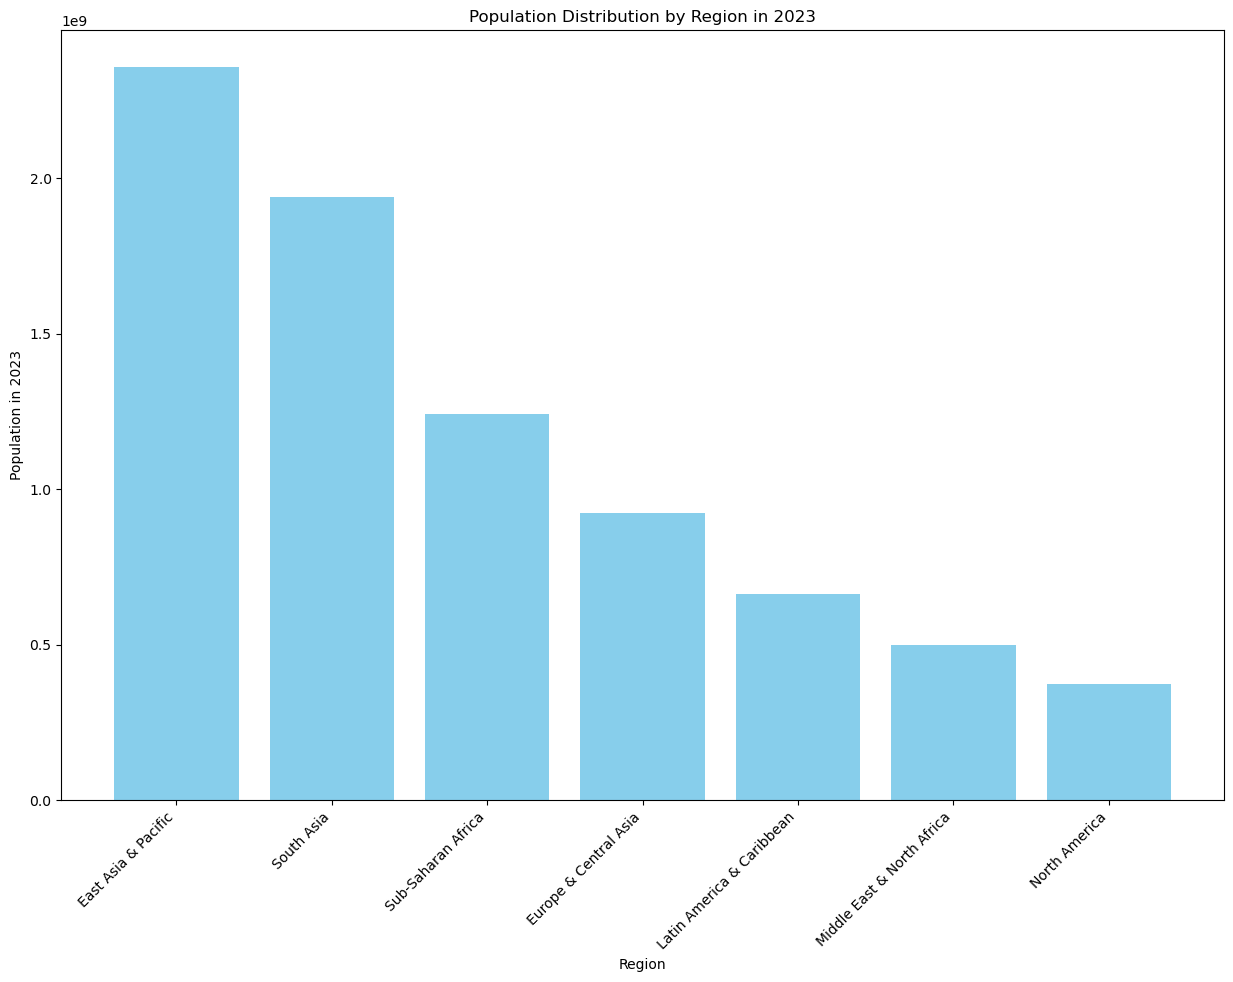

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'API_SP.POP.TOTL_DS2_en_csv_v2_687108.csv'
metadata_country_path = 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_687108.csv'
metadata_indicator_path = 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_687108.csv'

data = pd.read_csv(data_path, skiprows=4)
metadata_country = pd.read_csv(metadata_country_path)
metadata_indicator = pd.read_csv(metadata_indicator_path)

merged_data = data.merge(metadata_country, how='left', left_on='Country Code', right_on='Country Code')

data_2023 = merged_data[['Country Name', 'Region', 'IncomeGroup', '2023']].dropna(subset=['2023', 'Region'])

data_2023_region = data_2023.groupby('Region')['2023'].sum().reset_index()

data_2023_region_sorted = data_2023_region.sort_values(by='2023', ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(data_2023_region_sorted['Region'], data_2023_region_sorted['2023'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Population in 2023')
plt.title('Population Distribution by Region in 2023')
plt.xticks(rotation=45, ha='right')
plt.show()
